In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(viridis)
source("../Scripts/functions.R")
source("../Scripts/plots.r")
options(repr.plot.width=20, repr.plot.height=10)

Attaching SeuratObject

Warning message:
“package ‘dplyr’ was built under R version 4.1.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘docstring’


The following object is masked from ‘package:utils’:

    ?




# Get Figure 1

In [2]:
output <- "../Results/"
test   <- read.csv("../Results/celltypeAccuracies_PBMC.csv", header = F)
methods <- c("Seurat", "CellID", "SCN", "ItClust", "MLP")
celltypes <- c('B cell','CD14+ monocyte','CD16+ monocyte','CD4+ T cell','Cytotoxic T cell','Dendritic cell',
               'Megakaryocyte', 'Natural killer cell','Plasmacytoid dendritic cell')
steps <-  c(42,100,136,500,1000,2000)#,3000
main_celltypes <- c("Plasmacytoid dendritic cell","CD16+ monocyte", "CD14+ monocyte",  "Cytotoxic T cell")
colnames(test) <- c("Method", "Version", "CellsPerCelltype", "SetNr", celltypes, "Accuracy")
test <- test[!(duplicated(test[,c("Method", "Version", "CellsPerCelltype", "SetNr")])),]
test <- test[test$CellsPerCelltype %in% steps,]
test <- test[test$Method %in% methods,]

In [3]:
summary_mono <- summarize_data(test, "Mono", steps)
sizes <- data.frame(CellType = celltypes, maxSize = c(104,203,244,1111,1664,148,145,174,42))

`summarise()` has grouped output by 'Method', 'Version', 'CellsPerCelltype'. You can override using the `.groups` argument.


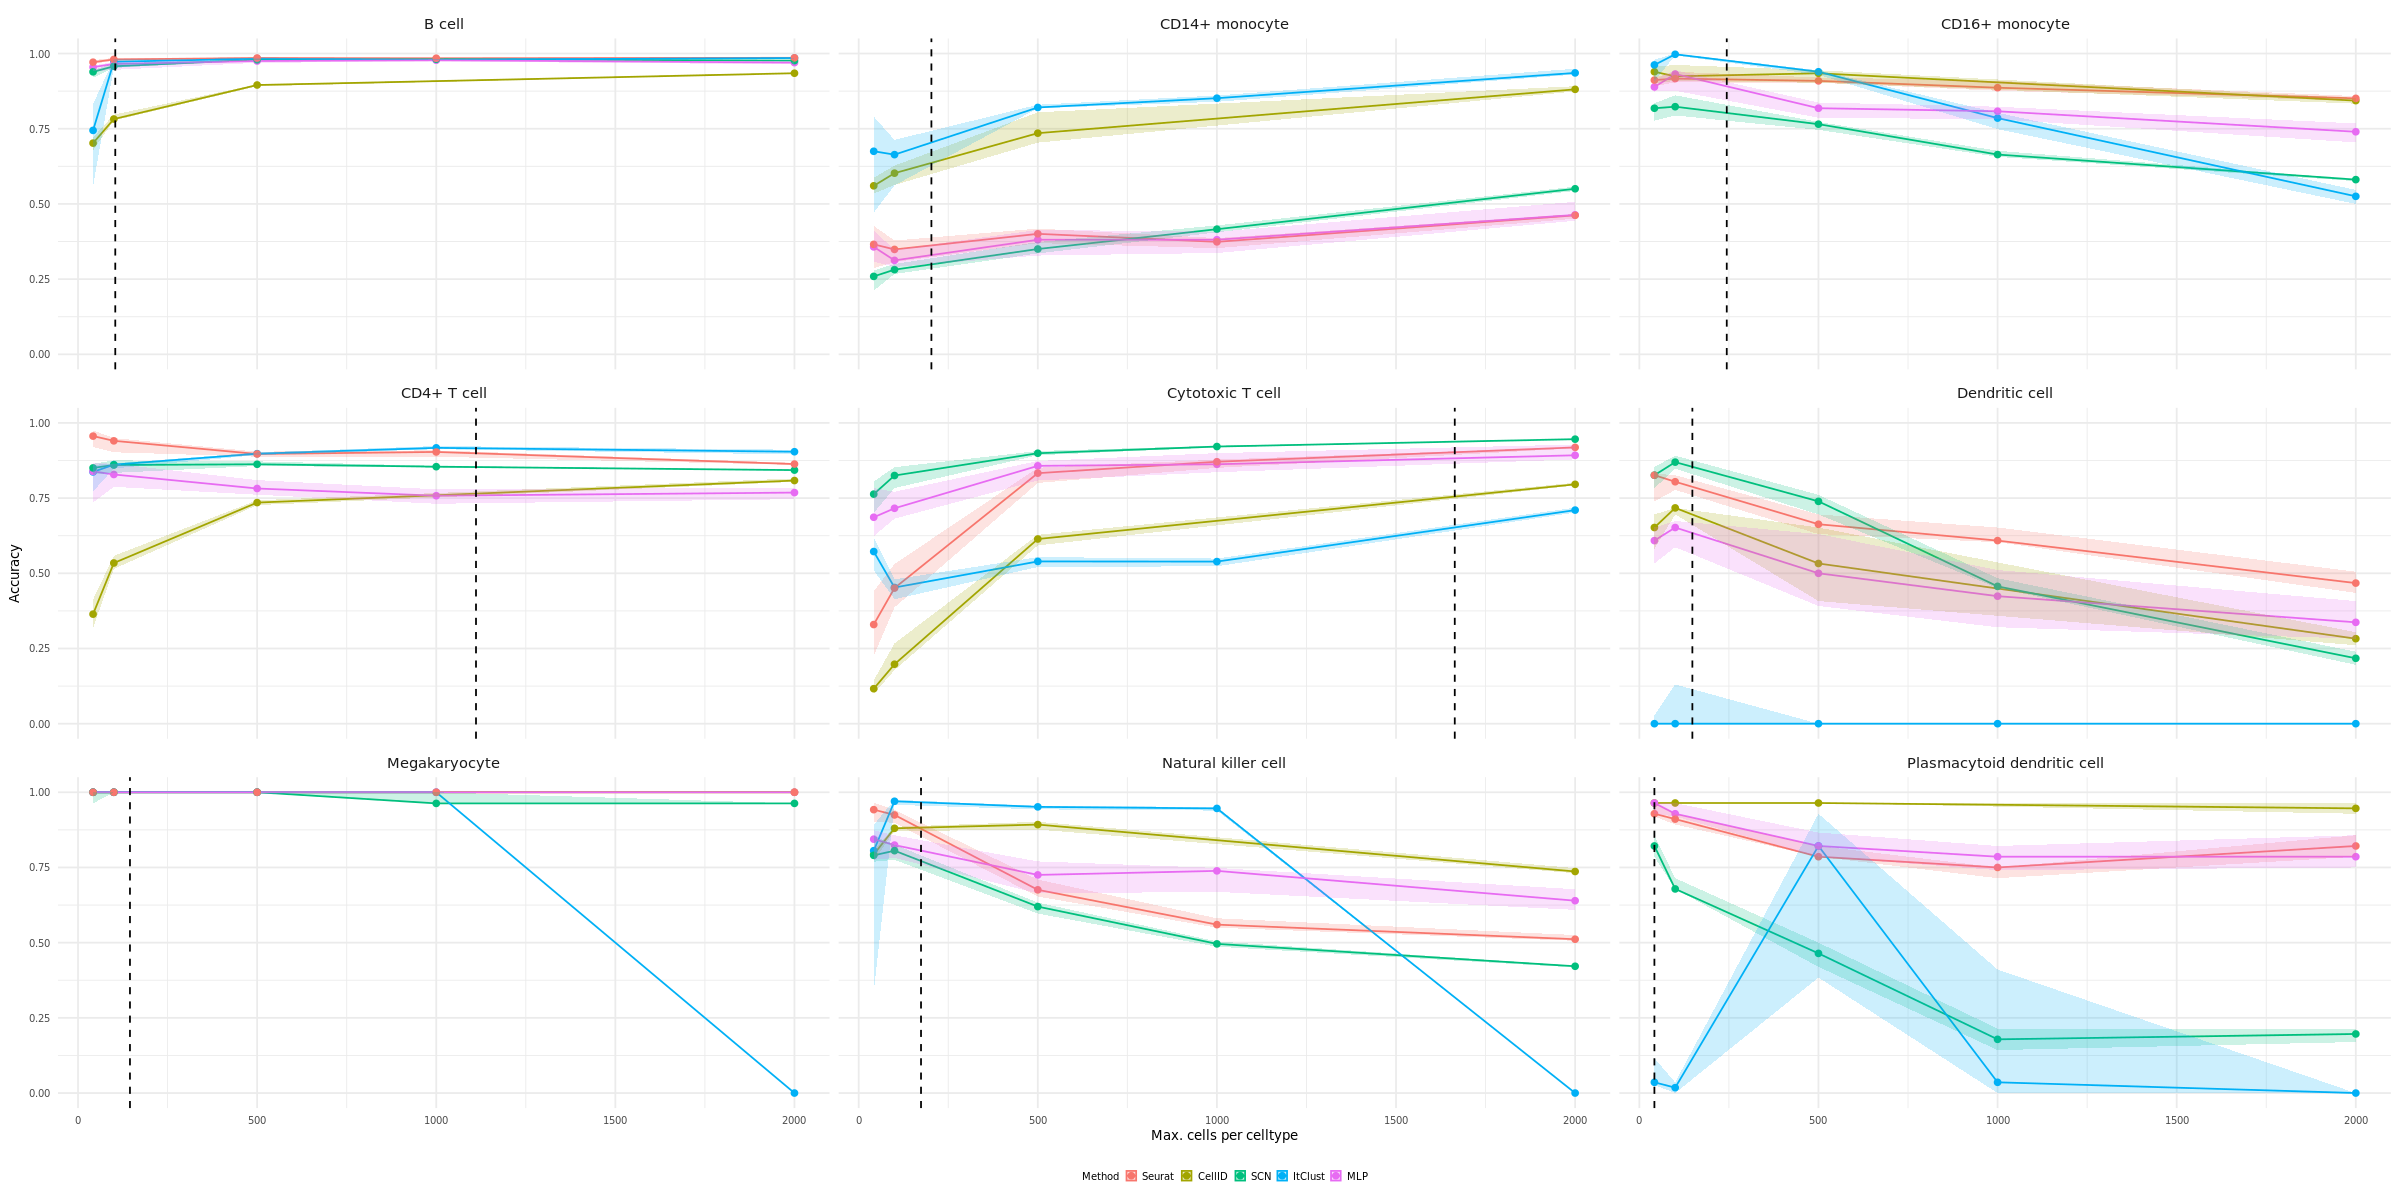

In [4]:
s1 <-  plot_accuracy(summary_mono, c(celltypes), ncols = 3, pos = "bottom", methods = methods, maxSizes = sizes)
ggsave(paste0(output, "s1_accuracies_mono.png"), plot = s1, device = "png", dpi=350,  width=178, height = 100, units = "mm")
s1

In [5]:
summary_mosaic <- summarize_data(test, "Mosaic", c(136,steps))
s2 <-  plot_accuracy(summary_mosaic, c(celltypes), ncols = 3, pos = "bottom", methods = methods)
ggsave(paste0(output, "s2_accuracies_mosaic.png"), plot = s2, device = "png", dpi=350,  width=178, height = 100, units = "mm")
s2

`summarise()` has grouped output by 'Method', 'Version', 'CellsPerCelltype'. You can override using the `.groups` argument.


ERROR: Error in FUN(X[[i]], ...): object 'maxSize' not found


In [ ]:
s3A <- plot_accuracy(summary_mono, c("Accuracy"), ncols = 1, pos = "bottom", methods = methods)
s3B <- plot_accuracy(summary_mosaic, c("Accuracy"), ncols = 1, pos = "bottom", methods = methods)
s3  <- ggpubr::ggarrange(s3A, s3B, common.legend = T,legend = "right", nrow=1, labels=c("A) Mono-Source Training data", "B) Mosaic Training data"),font.label = list(size = 8))

ggsave(paste0(output, "s3_accuracies.png"), plot = s3, device = "png", dpi=350,  width=178, height = 50, units = "mm")
s3

No id variables; using all as measure variables

Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”


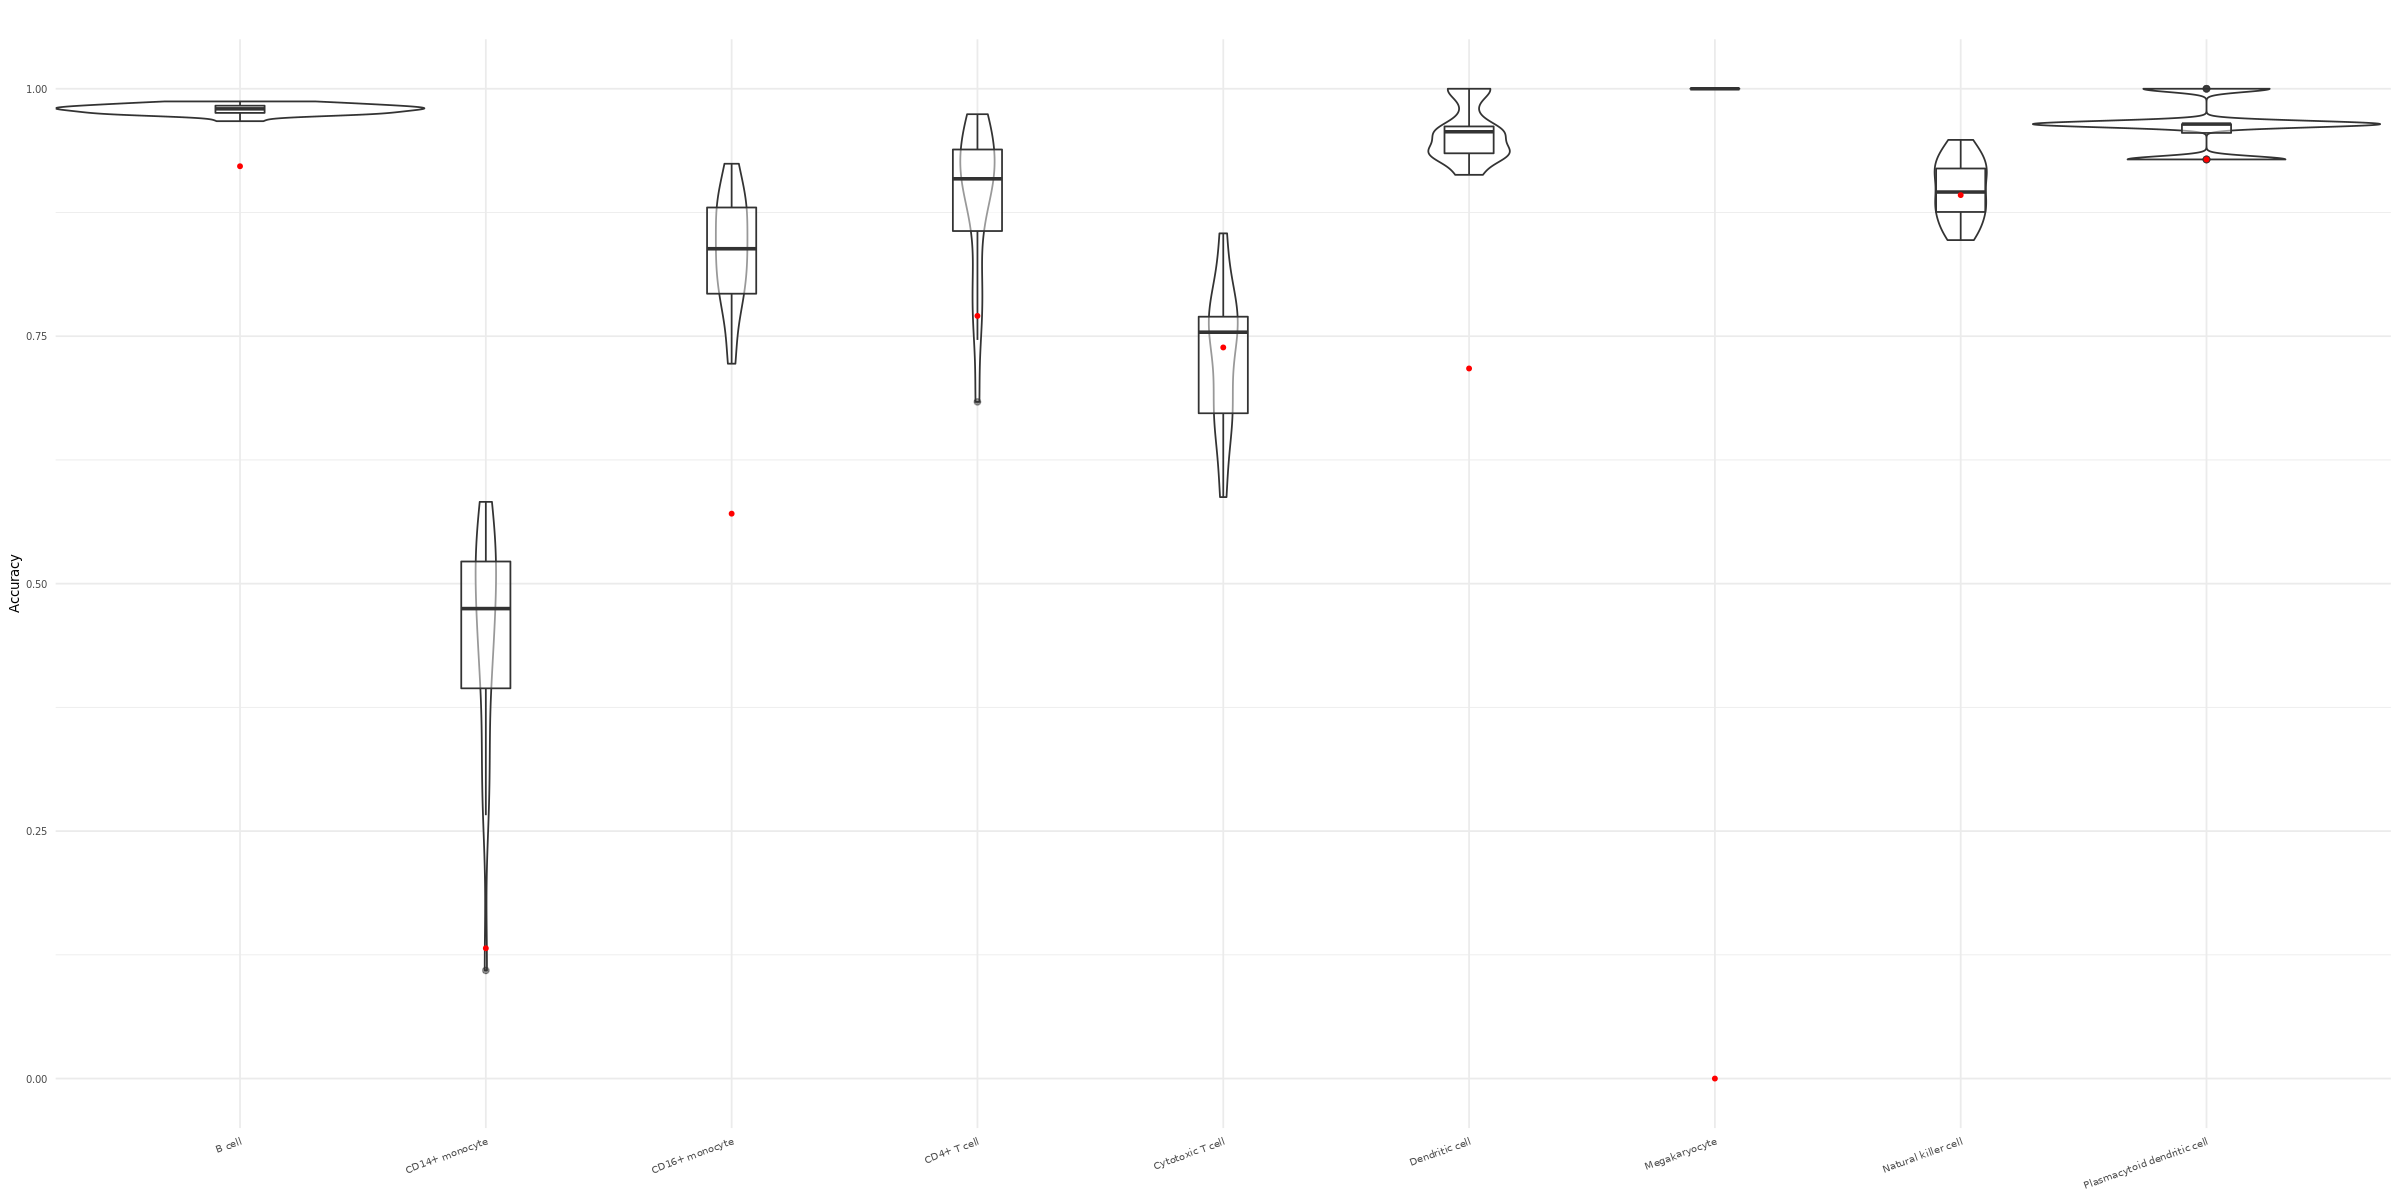

In [6]:
getAzimuth <- function(data, size, file, celltypes, title){
    seurat <- reshape2::melt(data[data$Method =="Seurat" & data$CellsPerCelltype == size, celltypes])
    data_azimuth <- read.csv(file)
    accuracies <- unlist(lapply(celltypes,
                                function(class) sum(data_azimuth$prediction[data_azimuth$class_ == class] == class, na.rm = T) /
                                                nrow(data_azimuth[data_azimuth$class_ == class,])))
    names(accuracies) <- celltypes
    azimuth <- data.frame(accuracies)
    azimuth$variable <- rownames(azimuth)
    plot <-  ggplot(seurat, aes(variable, value))+ geom_violin(width=1.5)+theme_minimal() +
             geom_boxplot(width=0.2, alpha=0.5)+ 
             geom_point(data = azimuth, aes(variable, accuracies), color="red", size=1)+
             xlab(NULL) + ylab("Accuracy") + ylim(0,1) + 
    theme( axis.text.y=element_text(size=6), axis.title=element_text(size=8),
              axis.text.x=element_text(size=6, angle=20, hjust = 1),
              legend.position = "bottom", legend.key.size = unit(0.5,"line")) +labs(title=title) 
    return(plot)
}
azimuthfile <- "../Results/azimuth_pred.txt"

#f3A <-  getAzimuth(test,42,azimuthfile, celltypes, "A) Mono-source reference")


f3B <-  getAzimuth(test,136,azimuthfile, celltypes, "")

#f3 <-  ggpubr::ggarrange(f3A,f3B, nrow=1)
f3B
ggsave(paste0(output, "f3_azimuth.png"), plot = f3B, device = "png", dpi=350,  width=86, height = 75, units = "mm")